<a href="https://colab.research.google.com/github/dhruvk98/Machine-Learning-Datasets/blob/master/air_quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Air Quality Data
Contains the responses of a gas multisensor device deployed on the field in an Italian city. Hourly responses averages are recorded along with gas concentrations references from a certified analyzer.

Dataset Link: https://archive.ics.uci.edu/ml/datasets/Air+Quality

### Attribute Information:

1. Date (DD/MM/YYYY)

2. Time (HH.MM.SS)

3. True hourly averaged concentration CO in mg/m^3 (reference analyzer)

4. PT08.S1 (tin oxide) hourly averaged sensor response (nominally CO targeted)

5. True hourly averaged overall Non Metanic HydroCarbons concentration in microg/m^3 (reference analyzer)

6. True hourly averaged Benzene concentration in microg/m^3 (reference analyzer)

7. PT08.S2 (titania) hourly averaged sensor response (nominally NMHC targeted)

8. True hourly averaged NOx concentration in ppb (reference analyzer)

9. PT08.S3 (tungsten oxide) hourly averaged sensor response (nominally NOx targeted)

10. True hourly averaged NO2 concentration in microg/m^3 (reference analyzer)

11. PT08.S4 (tungsten oxide) hourly averaged sensor response (nominally NO2 targeted)

12. PT08.S5 (indium oxide) hourly averaged sensor response (nominally O3 targeted)

13. Temperature in °C

14. Relative Humidity (%) - Our Target Variable

15. Absolute Humidity (AH)

Our aim is to create a model that predicts the _relative humidity_ accurately. 



## Importing our libraries

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as dt

In [0]:
dateparse = lambda x: dt.datetime.strptime(x, '%m/%d/%Y')
df = pd.read_csv('AirQualityUCI.csv',sep=',',
                 na_filter=True, parse_dates = ['Date'], date_parser=dateparse,                
                 na_values=-200, encoding='utf-8')

Let's check out our dataframe and see how it looks. Note that all feature values that were initially _-200_ have been set to _NaN_ values now. 

In [91]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2004-03-10,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2004-03-10,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2004-03-10,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,2004-03-10,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [92]:
df.tail()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9352,2005-04-04,10:00:00,3.1,1314.0,NaN,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9353,2005-04-04,11:00:00,2.4,1163.0,NaN,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,2005-04-04,12:00:00,2.4,1142.0,NaN,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,2005-04-04,13:00:00,2.1,1003.0,NaN,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139
9356,2005-04-04,14:00:00,2.2,1071.0,NaN,11.9,1047.0,265.0,654.0,168.0,1129.0,816.0,28.5,13.1,0.5028


In [93]:
df.shape

(9357, 15)

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   CO(GT)         7674 non-null   float64       
 3   PT08.S1(CO)    8991 non-null   float64       
 4   NMHC(GT)       914 non-null    float64       
 5   C6H6(GT)       8991 non-null   float64       
 6   PT08.S2(NMHC)  8991 non-null   float64       
 7   NOx(GT)        7718 non-null   float64       
 8   PT08.S3(NOx)   8991 non-null   float64       
 9   NO2(GT)        7715 non-null   float64       
 10  PT08.S4(NO2)   8991 non-null   float64       
 11  PT08.S5(O3)    8991 non-null   float64       
 12  T              8991 non-null   float64       
 13  RH             8991 non-null   float64       
 14  AH             8991 non-null   float64       
dtypes: datetime64[ns](1),

## Data Preprocessing

Let's see how many null values we have in our columns.

In [95]:
df.isnull().sum()

Date                0
Time                0
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

We observe that a lot of our columns have missing data. Most notably, the NMHC column has a lot of missing instances so we should drop it. 

In [0]:
df.drop('NMHC(GT)',axis='columns',inplace=True)

In [97]:
df.isnull().sum()

Date                0
Time                0
CO(GT)           1683
PT08.S1(CO)       366
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

Now, we're going to drop any rows which have at least 10 instance values that are not NaN values.

In [0]:
df.dropna(axis=0,thresh=10,inplace=True)

In [99]:
df.shape

(8991, 14)

Next we're going to fill in any remaining missing vales.

In [100]:
df.isnull().sum()

Date                0
Time                0
CO(GT)           1647
PT08.S1(CO)         0
C6H6(GT)            0
PT08.S2(NMHC)       0
NOx(GT)          1595
PT08.S3(NOx)        0
NO2(GT)          1598
PT08.S4(NO2)        0
PT08.S5(O3)         0
T                   0
RH                  0
AH                  0
dtype: int64

We observe that 3 columns CO(GT), NOx(GT) and NO2(GT) still contain missing values. So we'll impute the mean values for each hour and fill our dataframe accordingly. For that we need to compute an hour column using our time column.

In [0]:
df['Hour'] = df['Time'].apply(lambda x: int(x.split(':')[0]))
df.drop('Time',axis='columns',inplace=True)

Similarly, we create a month column for our data. 

In [0]:
df['Month'] = df['Date'].dt.month
df.drop('Date',axis='columns',inplace=True)

Now, to impute the the mean values for our missing values we utilize the groupby function which groups our data on the basis of the _Hour_ feature. 

In [103]:
df['CO(GT)'].fillna(df.groupby('Hour')['CO(GT)'].transform('mean'),inplace=True)
df['NOx(GT)'].fillna(df.groupby('Hour')['NOx(GT)'].transform('mean'),inplace=True)
df['NO2(GT)'].fillna(df.groupby('Hour')['NO2(GT)'].transform('mean'),inplace=True)
df.isnull().sum()

CO(GT)           0
PT08.S1(CO)      0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
Hour             0
Month            0
dtype: int64

## Exploratory Data Analysis

In [104]:
df.describe().T # for better readability

,count,mean,std,min,25%,50%,75%,max
CO(GT),8991.0,2.094249,1.353915,0.1000,1.079479,1.857188,2.8000,11.900
PT08.S1(CO),8991.0,1099.833166,217.080037,647.0000,937.000000,1063.000000,1231.0000,2040.000
C6H6(GT),8991.0,10.083105,7.449820,0.1000,4.400000,8.200000,14.0000,63.700
PT08.S2(NMHC),8991.0,939.153376,266.831429,383.0000,734.500000,909.000000,1116.0000,2214.000
NOx(GT),8991.0,237.219195,191.446569,2.0000,108.000000,186.000000,313.0000,1479.000
PT08.S3(NOx),8991.0,835.493605,256.817320,322.0000,658.000000,806.000000,969.5000,2683.000
NO2(GT),8991.0,110.880315,44.689444,2.0000,80.115385,109.000000,135.0000,333.000
PT08.S4(NO2),8991.0,1456.264598,346.206794,551.0000,1227.000000,1463.000000,1674.0000,2775.000
PT08.S5(O3),8991.0,1022.906128,398.484288,221.0000,731.500000,963.000000,1273.5000,2523.000
T,8991.0,18.317829,8.832116,-1.9000,11.800000,17.800000,24.4000,44.600


Let's visualize the distribution of all of our features.

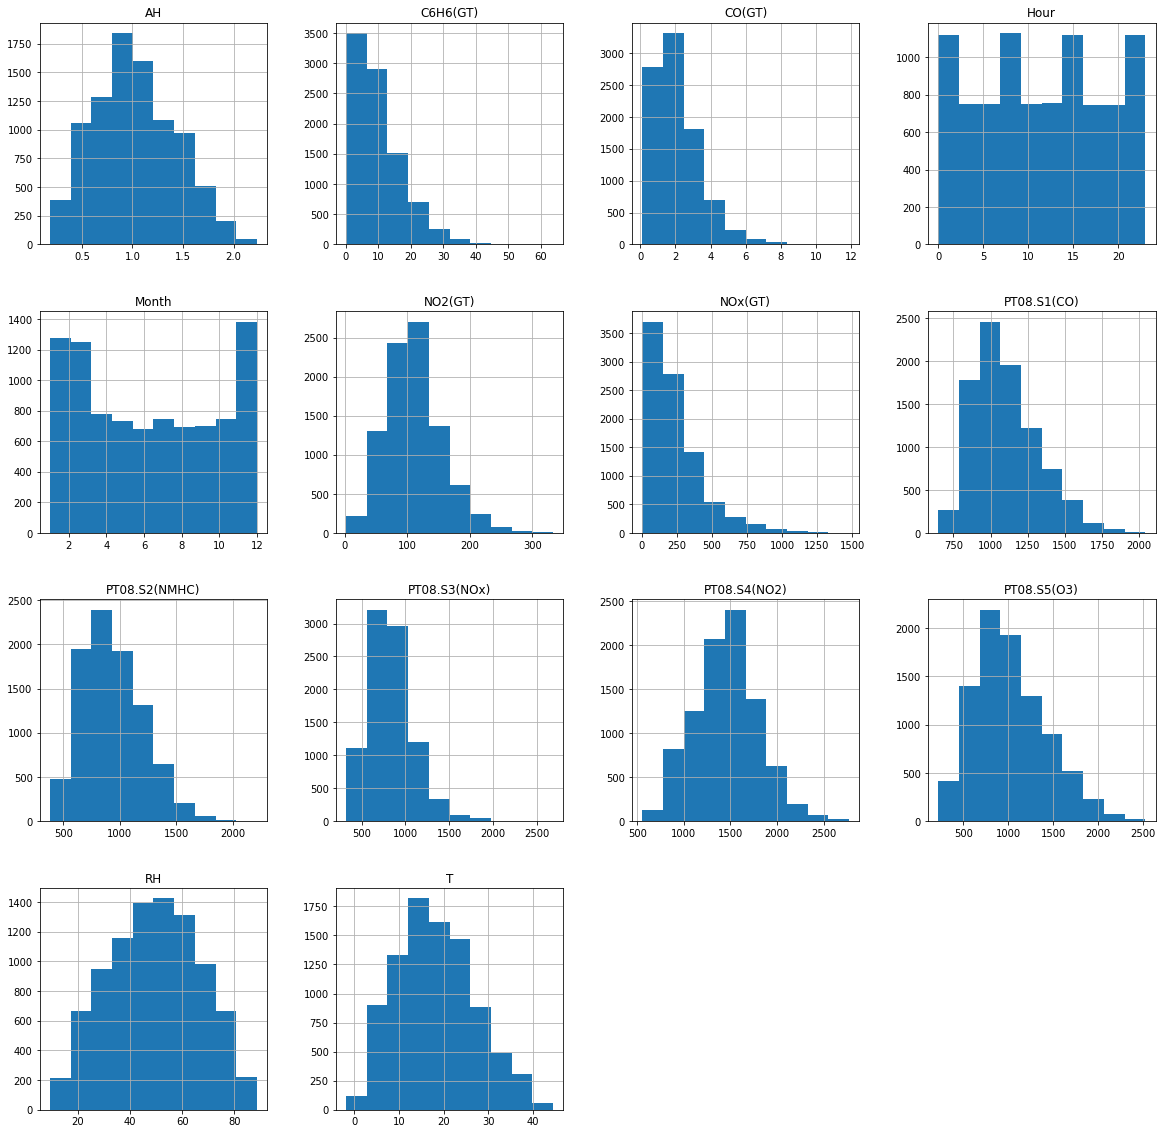

In [105]:
df.hist(bins=10,figsize=(20,20))
plt.show()

Now let's plot Pearson's correlation matrix to visualize the correlation between our features. 

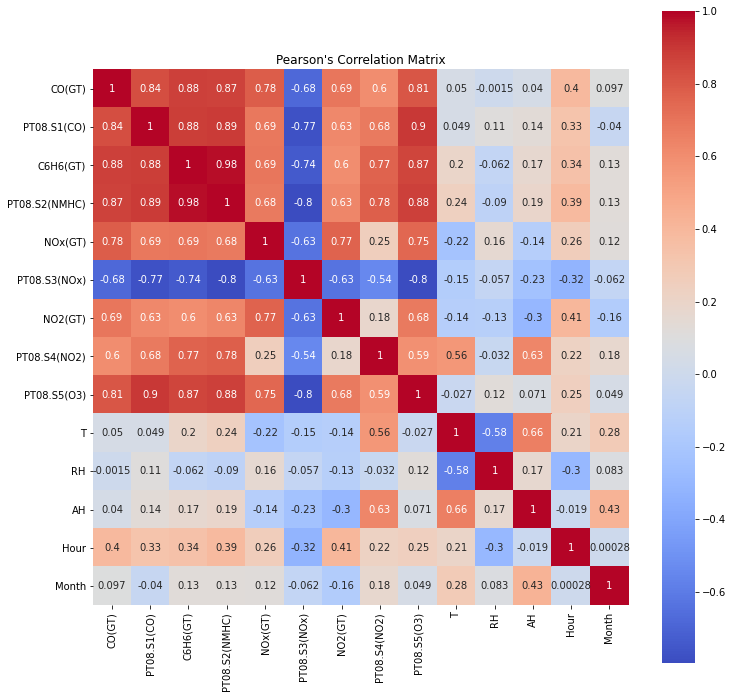

In [106]:
corr = df.corr()
plt.figure(figsize=(12,12))
plt.title('Pearson\'s Correlation Matrix')
sns.heatmap(corr,square=True,
            cmap='coolwarm',annot=True)
plt.show()

Now let's split our data and create the training and test sets.

In [107]:
np.random.seed(42) # used to make output of notebook identical each time
X = df.drop('RH', axis=1)
y = df['RH']
print(X.head())

   CO(GT)  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)  ...     T      AH  Hour  Month
0     2.6       1360.0      11.9         1046.0  ...  13.6  0.7578    18      3
1     2.0       1292.0       9.4          955.0  ...  13.3  0.7255    19      3
2     2.2       1402.0       9.0          939.0  ...  11.9  0.7502    20      3
3     2.2       1376.0       9.2          948.0  ...  11.0  0.7867    21      3
4     1.6       1272.0       6.5          836.0  ...  11.2  0.7888    22      3

[5 rows x 13 columns]


Before we move on, let's scale our data. 

In [108]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_new = pd.DataFrame(scaler.fit_transform(X),index=X.index, columns=X.columns)
X_new.head()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,AH,Hour,Month
0,0.211864,0.511845,0.185535,0.362097,0.111036,0.310885,0.335347,0.513040,0.454822,0.333333,0.280066,0.782609,0.181818
1,0.161017,0.463029,0.146226,0.312398,0.068382,0.360864,0.271903,0.453237,0.326238,0.326882,0.264282,0.826087,0.181818
2,0.177966,0.541996,0.139937,0.303659,0.087339,0.346463,0.338369,0.451439,0.370547,0.296774,0.276352,0.869565,0.181818
3,0.177966,0.523331,0.143082,0.308575,0.115098,0.326133,0.362538,0.464478,0.426586,0.277419,0.294190,0.913043,0.181818
4,0.127119,0.448672,0.100629,0.247406,0.087339,0.373994,0.344411,0.422212,0.386186,0.281720,0.295216,0.956522,0.181818


In [109]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new,y,test_size=0.3,shuffle=True)
print(X_train.shape, X_test.shape)
print(y_train.shape,y_test.shape)

(6293, 13) (2698, 13)
(6293,) (2698,)


## Model Selection

### Linear Regression


In [0]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(n_jobs=-1)
lr.fit(X_train,y_train)
y_lr = lr.predict(X_test)

Let's make a graph to see how our Linear Regression model fits our data.

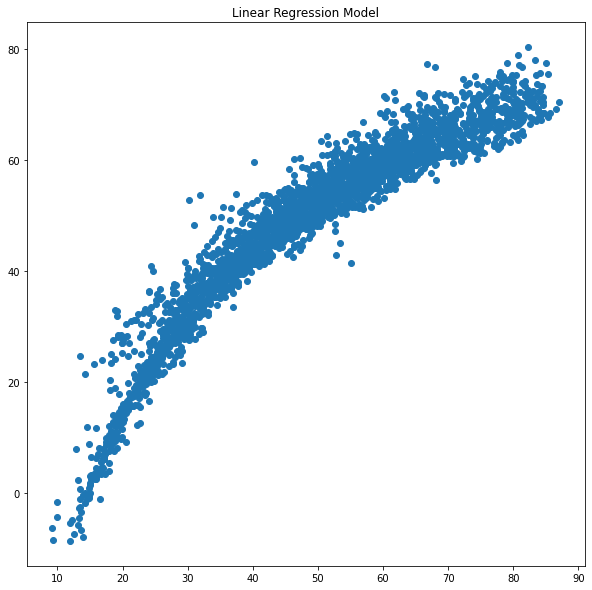

In [111]:
# Plot outputs
# sns.regplot(x='Month',y='RH',data=df)
plt.figure(figsize=(10,10))
plt.scatter(y_test,y_lr)
plt.title('Linear Regression Model')
plt.show()

Let us evaluate our model on the following metrics - 

1. **R2 Score:** A score function (the higher the better)
2. **RMSE:** A cost function (the lower the better)

In [112]:
from sklearn.metrics import r2_score, mean_squared_error
print('R2 Score:',r2_score(y_test,y_lr))
print('RMSE:',np.sqrt(mean_squared_error(y_test, y_lr)))

R2 Score: 0.8804354705803203
RMSE: 6.014347187759221


### Support Vector Regression

In [0]:
from sklearn.svm import SVR
svr = SVR() 
svr.fit(X_train,y_train)
y_svr = svr.predict(X_test)

In [114]:
print('R2 Score:',r2_score(y_test,y_svr))
print('RMSE:',np.sqrt(mean_squared_error(y_test, y_svr)))

R2 Score: 0.9471184481619097
RMSE: 3.9998104528074117


### Decision Tree Regressor

In [0]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)
y_dtr = dtr.predict(X_test)

In [116]:
print('R2 Score:',r2_score(y_test,y_dtr))
print('RMSE:',np.sqrt(mean_squared_error(y_test, y_dtr)))

R2 Score: 0.9937942699036006
RMSE: 1.3701993491774422


### Random Forest Regressor

In [0]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
y_rf = rf.predict(X_test)

In [118]:
print('R2 Score:',r2_score(y_test,y_rf))
print('RMSE:',np.sqrt(mean_squared_error(y_test, y_rf)))

R2 Score: 0.998317762080435
RMSE: 0.7133965824419704


Since our model seems to be overfitting, let's try and calculate the Adjusted R-squared value. 

In [119]:
n = y.shape[0]
p = 13
adj_rsquared = 1 - (1 - r2_score(y_test,y_rf)) * ((n - 1)/(n-p-1))
print(adj_rsquared)

0.9983153259555654


### Lasso Regression

In [120]:
from sklearn.linear_model import Lasso
la = Lasso(alpha=1.0)
la.fit(X_train,y_train)
y_la = la.predict(X_test)
print(la.score(X_train,y_train))
print(la.score(X_test,y_test))

0.3436214062970476
0.34105635507146326


In [121]:
print('R2 Score:',r2_score(y_test,y_la))
print('RMSE:',np.sqrt(mean_squared_error(y_test, y_la)))

R2 Score: 0.34105635507146326
RMSE: 14.119244286409344
